In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
batch1 = pd.read_parquet('../batches_train/batch_1_repartitions/part.0.parquet')
sensor_geom = pd.read_csv('../sensor_geometry.csv')

In [3]:
def id_to_xyz(sen):
    return sensor_geom.loc[sen][['x','y','z']].values

In [79]:
test = event[['sensor_id', 'time']].reset_index()

In [80]:
for i in range(0, len(event)):
    test.loc[i,['x','y','z']] = id_to_xyz(test.loc[i,'sensor_id'])

In [81]:
test

,event_id,sensor_id,time,x,y,z
0,140,101,9895,-132.80,-501.45,-197.78
1,140,99,9911,-132.80,-501.45,-163.73
2,140,98,10119,-132.80,-501.45,-146.71
3,140,457,10530,-211.35,-404.48,-131.14
4,140,97,10716,-132.80,-501.45,-129.69
5,140,461,10763,-211.35,-404.48,-199.22
6,140,459,10797,-211.35,-404.48,-165.18
7,140,1481,10944,-121.77,-171.03,-195.58
8,140,1478,10947,-121.77,-171.03,-144.51
9,140,460,10981,-211.35,-404.48,-182.20


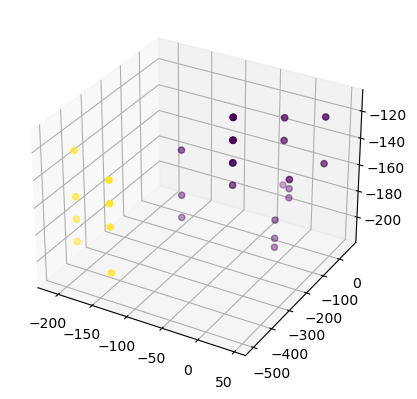

Number of clusters: 2


In [35]:
event = batch1[batch1.auxiliary==False].loc[140]

raw_data = [id_to_xyz(sen) for sen in event.sensor_id]

import scipy.cluster.hierarchy as hcluster
threshhold = 150

clusters = hcluster.fclusterdata(raw_data,threshhold,criterion='distance')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

xs = [a[0] for a in raw_data]
ys = [a[1] for a in raw_data]
zs = [a[2] for a in raw_data]

ax.scatter(xs, ys, zs,
           c=clusters)

plt.show()

print("Number of clusters:", len(set(clusters)))